## Question 1

(a) Load the dataset and construct a feature vector for each article in the entire dataset. You need to report the number of articles, and the number of extracted features. Show 5 example articles with their extracted features using a dataframe.

In [2]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ------------- ----------------------- 61.4/162.8 kB 812.7 kB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/8.0 MB 17.6 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.0 MB 28.9 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/8.0 MB 33.7 MB/s eta 0:00:01
   ------------------------------- -------- 6.2/8.0 MB 33.1 MB/s eta 0:00:01
   ---------------------------------------  7.8/8.0 MB 33.3 MB/s eta 0:00:01
   ---------------------------------------  8.0/8.0 MB 34.0 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 28.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/188.2 kB ? eta -:--:--
   -----------

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

data = pd.read_csv('train.csv')
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(data['Text'])
X = data.drop('Category', axis=1)
y = data['Category']


# training data
X_bow = pd.DataFrame(data=matrix.toarray(), columns=vectorizer.get_feature_names_out())
#(number of documents, number of features)
X_bow.shape

(428, 13518)

In [8]:
#top 5
non_zero_cols = X_bow.loc[:4].sum() != 0
non_zero_cols = non_zero_cols[non_zero_cols].index.tolist()

top5 = X_bow[non_zero_cols]

top5.head()

,000,10,11,12,121,125,14,165,17,19,...,woven,writing,written,year,yearned,years,younger,youngsters,youthful,zooropa
0,1,0,0,0,0,0,2,0,0,0,...,1,1,0,0,0,1,2,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,1,0,0,1,0,1,...,0,0,1,2,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,1,2,0,0,1,1


<Axes: >

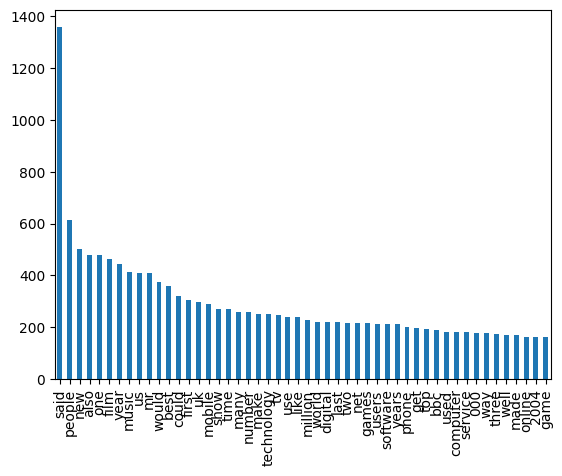

In [9]:
feature_sum = X_bow.sum(axis=0)
feature_sum = feature_sum.sort_values(ascending=False)
feature_sum = feature_sum.head(50)
feature_sum.plot.bar()
# vocab = vectorizer.vocabulary_
# #sorted_vocab =
# #top50 = list(sorted_vocab)[140:160]
# pd.DataFrame(vocab, columns=['Term', 'Index'])

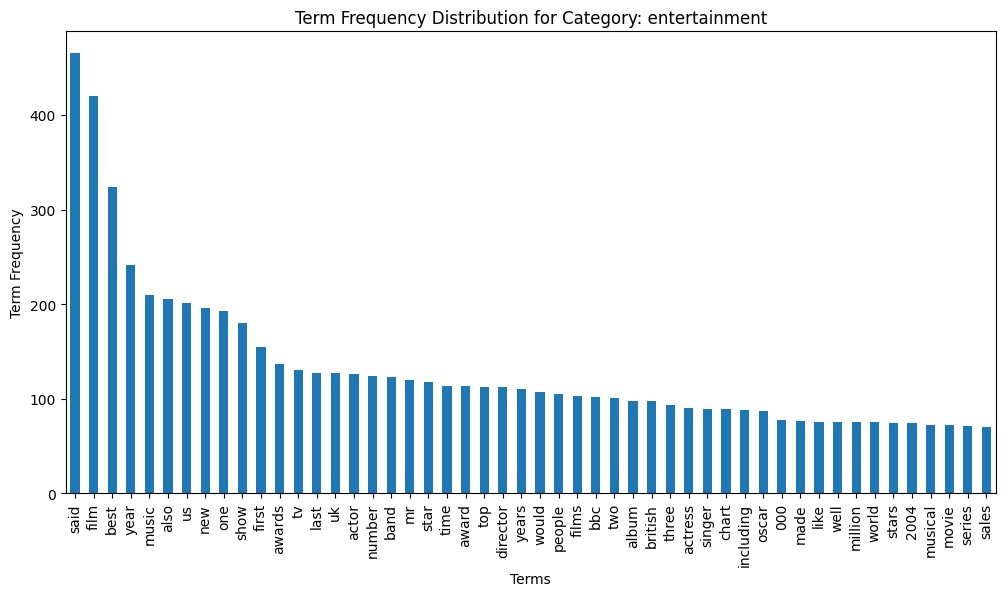

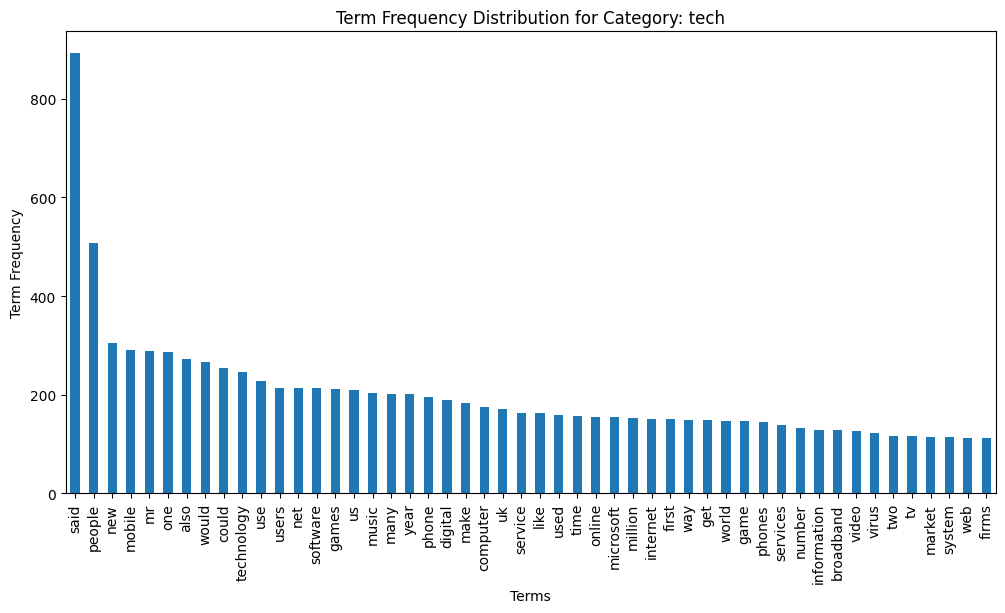

In [11]:
# Group the data by category
grouped = X_bow.join(data['Category']).groupby('Category')

# Plot the term frequency distribution for each category
for category, group in grouped:
    plt.figure(figsize=(12, 6))
    term_freq = group.drop('Category', axis=1).sum(axis=0)  # Drop the 'Category' column
    term_freq = term_freq.sort_values(ascending=False)[:50]  # Sort the term frequencies
    term_freq.plot(kind='bar')
    plt.xlabel('Terms')
    plt.ylabel('Term Frequency')
    plt.title(f'Term Frequency Distribution for Category: {category}')
    plt.xticks(rotation=90)
    plt.show()

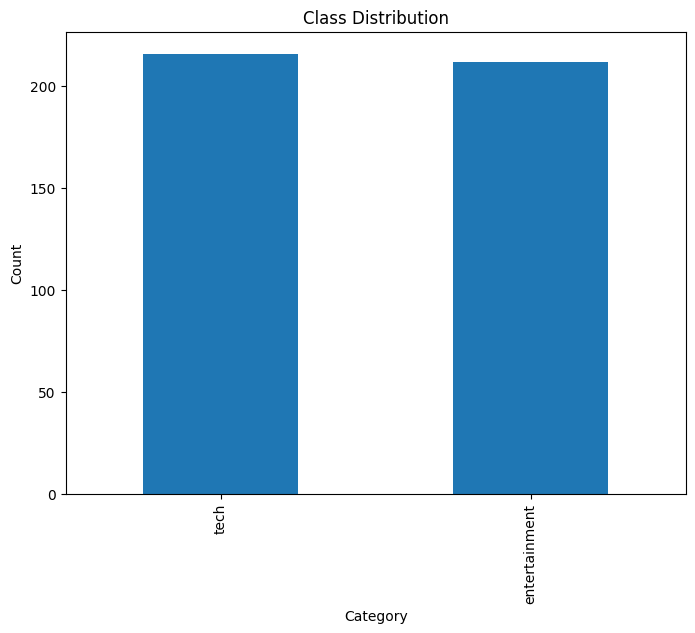

In [12]:
# Plot the class distribution
plt.figure(figsize=(8, 6))
data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()